# Image Prediction using Deep Learning on MNIST Dataset using Keras

Convolutional neural networks are commonly used in computer vision applications such as image classification, object recognition, image segmentation, and many others. I have used Keras to implement the Image Classification task. I have used the COnv2D layer of the Keras library in a sequential model, to achieve the convolutional aspect of the netwrok. 

## Keras

Keras adheres to best practices for reducing cognitive load by providing consistent and simple APIs, minimizing the number of user actions required for common use cases, and providing clear and actionable feedback in the event of user error.
Keras is thus simple to learn and use. Keras is deeply integrated with low-level TensorFlow functionality, allowing you to create highly hackable workflows in which any piece of functionality can be customized.


In the Notebook, I have used Keras to create a Convolutional Neural Network. I have divided the Notebook into the following parts:

1)Loading the libraries and Tensorboard

2)Loading the MNIST and MNIST Fashion Dataset and Exploratory Data Analysis 

3)Building the Model

4)Compiling the Model

5)Testing the Model

6)Tensorboard Visualization of Model


## Section 1: Loading Libraries and Tensorboard

In [2]:
#Importing the metrics package of sklearn, numpy, matplotlib and tensorflow
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf
from tensorflow.keras.utils import to_categorical


#Importing the packages from keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#Importing the MNIST dataset from keras
from keras.datasets import mnist
tf.keras.datasets.fashion_mnist.load_data()
from keras.datasets import fashion_mnist

In [3]:
#Loading Tensorboard:

# Load the TensorBoard notebook extension
%load_ext tensorboard

#Setting up the tensorboard log location and using it in callbacks
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

## Section 1: Loading the MNIST Dataset and Exploratory Data Analysis 

#### DataSet 1: Digit Data

In the following section, I am loading the MNIST Digit Dataset. 

In [4]:
#Downloading the MNIST data and splitting it into train and test set:

(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

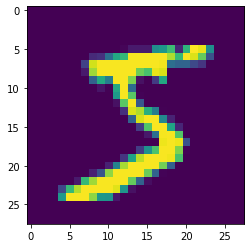

In [5]:
#plot the first image in the dataset
plt.imshow(X_train_digit[0])

I am checking the shape of the images, by printing the shape. This is necessary to understand how to build the model. 

#### DataSet 2: MNIST Fashion Dataset

In the below section, I am loading the MNIST Fashion dataset. 

In [6]:

(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()
assert x_train_fashion.shape == (60000, 28, 28)
assert x_test_fashion.shape == (10000, 28, 28)
assert y_train_fashion.shape == (60000,)
assert y_test_fashion.shape == (10000,)

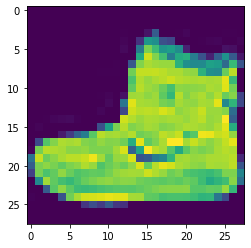

In [7]:
plt.imshow(x_train_fashion[0])

In [8]:
#check image shape
x_train_fashion[0].shape

(28, 28)

In the below section, I am reshaping the images. 

In [11]:
#reshape data to fit model
X_train = x_train_fashion.reshape(60000,28,28,1)
X_test = x_test_fashion.reshape(10000,28,28,1)

In [12]:

#one-hot encode target column
y_train = to_categorical(y_train_fashion)
y_test = to_categorical(y_test_fashion)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Section 3: Building the Model

In [13]:
#Building Model
model = Sequential()

#Adding the layers of the model

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

## Section 4: Compiling the Model

In [14]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Section 5: Testing the Model

In [15]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, callbacks=[tensorboard_callback])

Epoch 1/3
1875/1875 [==============================] - 72s 38ms/step - loss: 0.5617 - accuracy: 0.8351 - val_loss: 0.3902 - val_accuracy: 0.8561
Epoch 2/3
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3341 - accuracy: 0.8792 - val_loss: 0.3722 - val_accuracy: 0.8685
Epoch 3/3
1875/1875 [==============================] - 70s 38ms/step - loss: 0.2853 - accuracy: 0.8971 - val_loss: 0.3605 - val_accuracy: 0.8681


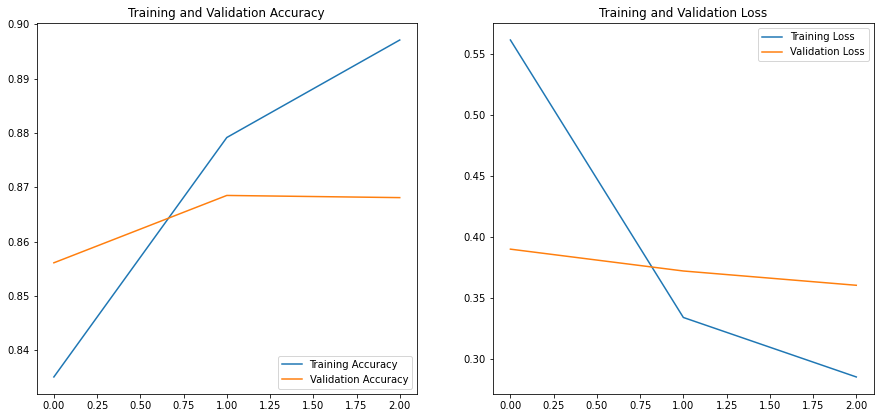

In [16]:
#I am plotting the training and validation accuracy of the model compiled above

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
#Making the predictions on the customized model:
#I am prinitng out the precision and accuracy on the test data. 

#predict first 4 images in the test set
model.predict(X_test[:4])
predictions_model = np.argmax(model.predict(X_test), axis=-1)

## Section 6: Tensorboard Visualization of Model

In [18]:
%tensorboard --logdir logs/fit

### Discussion of Results

In the Notebook, I have developed, trained and deployed a Convolutional Neural Network using Keras. The training and validation accuracy is quite high on both the training and validation set. The plot is also a testament ot how the training and validation loss has been declining over epochs whereas the accuracy has been increasing over epochs. 